<a href="https://colab.research.google.com/github/Viknesh-Rajaramon/Data-Mining/blob/master/HW2/HW2_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("https://raw.githubusercontent.com/Viknesh-Rajaramon/Data-Mining/master/HW2/train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/Viknesh-Rajaramon/Data-Mining/master/HW2/test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Part 1: Preprocess your Titanic training data

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df = train_df.drop(columns = ["PassengerId", "Name", "Ticket", "Fare", "Cabin", "Embarked"], axis = 1)
test_df = test_df.drop(columns = ["Name", "Ticket", "Fare", "Cabin", "Embarked"], axis = 1)
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [6]:
train_df = train_df.fillna(train_df["Age"].mean())
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [7]:
train_df["Sex"] = train_df["Sex"].map({"female" : 0, "male" : 1}).astype(int)
test_df["Sex"] = test_df["Sex"].map({"female" : 0, "male" : 1}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [8]:
train_df.shape

(891, 6)

In [9]:
x_train = train_df.drop("Survived", axis = 1)
y_train = train_df["Survived"]
x_test  = test_df.drop("PassengerId", axis = 1).copy()
x_train.shape, y_train.shape, x_test.shape

((891, 5), (891,), (418, 5))

# Part 2: Learn and fine-tune a decision tree model with the Titanic training data, plot your decision tree

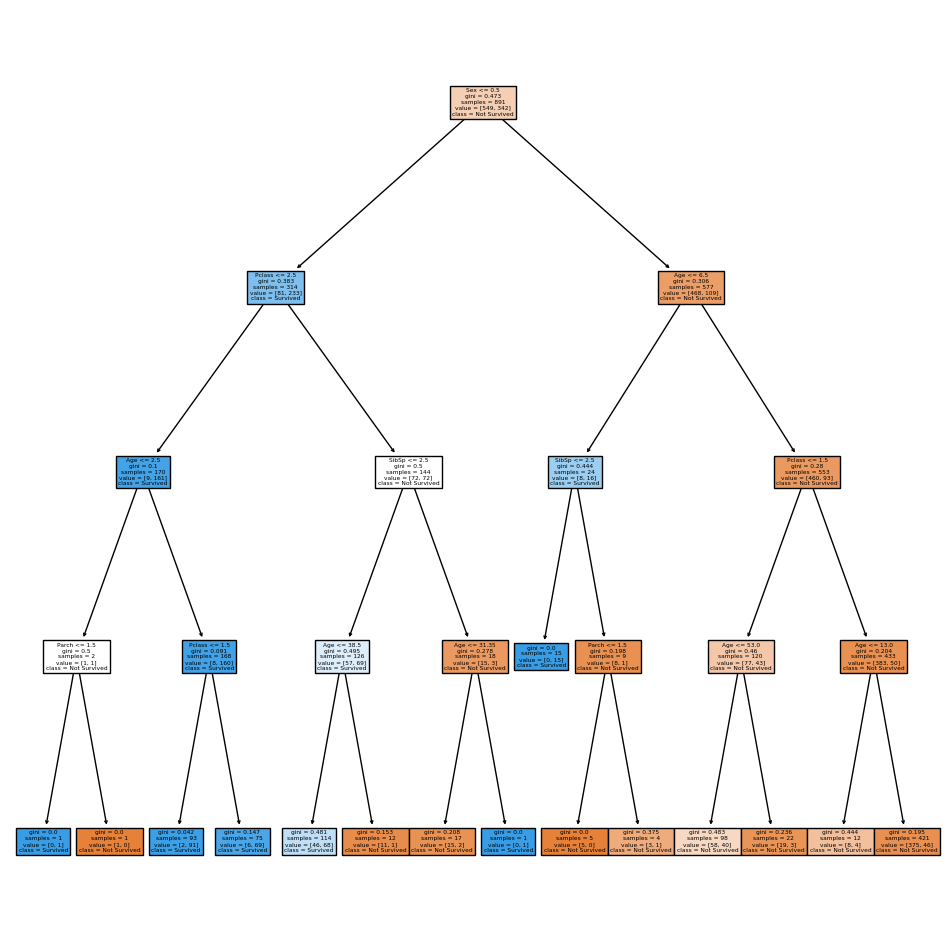

In [10]:
decision_tree = DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(x_train, y_train)

# Plot the decision tree
plt.figure(figsize = (12, 12))
plot_tree(decision_tree, filled = True, feature_names = x_train.columns, class_names = ["Not Survived", "Survived"])
plt.show()

# Part 3: Apply the five-fold cross validation of your fine-tuned decision tree learning model to the Titanic training data to extract average classification accuracy

In [11]:
acc_scores_dt = cross_val_score(decision_tree, x_train, y_train, cv = 5, scoring = "accuracy")
average_accuracy_dt = acc_scores_dt.mean()
print(f"Average Decision Tree Accuracy: {average_accuracy_dt}")

Average Decision Tree Accuracy: 0.8159437574540205


# Part 4: Apply the five-fold cross validation of your fine-tuned random forest learning model to the Titanic training data to extract average classification accuracy

In [12]:
random_forest = RandomForestClassifier(n_estimators = 500, random_state = 0, max_depth = 4, n_jobs = -1)

acc_scores_rf = cross_val_score(random_forest, x_train, y_train, cv = 5, scoring = "accuracy")
average_accuracy_rf = acc_scores_rf.mean()
print(f"Average Random Forest Accuracy: {average_accuracy_rf}")

Average Random Forest Accuracy: 0.8294017952419811


In [13]:
print(f"Average Decision Tree Accuracy: {average_accuracy_dt}")
print(f"Average Random Forest Accuracy: {average_accuracy_rf}")

print("Better Model:", "Decision Tree" if average_accuracy_dt > average_accuracy_rf else "Random Forest")

Average Decision Tree Accuracy: 0.8159437574540205
Average Random Forest Accuracy: 0.8294017952419811
Better Model: Random Forest
